In [67]:
import os, os.path

import cv2
from matplotlib import pyplot as plt

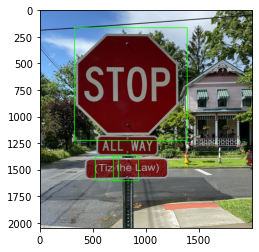

In [68]:

#---FOR-STILL-IMG-------------------------------------------------
# Opening image
img = cv2.imread("img/stop1.jpg")

# OpenCV opens images as BRG 
# but we want it as RGB We'll 
# also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  
# Use minSize because for not 
# bothering with extra-small 
# dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('trained/stop_data.xml')
  
found = stop_data.detectMultiScale(img_gray, 
                                   minSize =(20, 20))
  
# Don't do anything if there's 
# no sign
amount_found = len(found)
  
if amount_found != 0:
      
    # There may be more than one
    # sign in the image
    for (x, y, width, height) in found:
          
        # We draw a green rectangle around
        # every recognized sign
        cv2.rectangle(img_rgb, (x, y), 
                      (x + height, y + width), 
                      (0, 255, 0), 5)
          
# Creates the environment of 
# the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

In [69]:
#---FOR-IMG-SEQUENCE----------------------------------------------
#count number of files in a directory
seqDir = "img/imgSeq1"

path, dirs, files = next(os.walk(seqDir))
file_count = len(files)
print(file_count)

img = cv2.imread("img/imgSeq1/out1.jpg")

width = img.shape[1]
height = img.shape[0]

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('video.avi', fourcc, 10, (width, height))

for i in range(file_count):
    filename = "out" + str(i+1) + ".jpg"
    #print(filename)
    img = cv2.imread("img/imgSeq1/" + filename)

    # OpenCV opens images as BRG 
    # but we want it as RGB We'll 
    # also need a grayscale version
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    # Use minSize because for not 
    # bothering with extra-small 
    # dots that would look like STOP signs
    stop_data = cv2.CascadeClassifier('trained/stop_data.xml')
    
    found = stop_data.detectMultiScale(img_gray, 
                                    minSize =(20, 20))
    
    # Don't do anything if there's 
    # no sign
    amount_found = len(found)
    
    if amount_found != 0:
        
        # There may be more than one
        # sign in the image
        for (x, y, width, height) in found:
            
            # We draw a green rectangle around
            # every recognized sign
            cv2.rectangle(img_rgb, (x, y), 
                        (x + height, y + width), 
                        (0, 255, 0), 5)
                        
    '''
    # Creates the environment of 
    # the picture and shows it
    plt.subplot(1, 1, 1)
    plt.imshow(img_rgb)
    plt.show()
    '''

    video.write(img_rgb)

cv2.destroyAllWindows()
video.release()

109
